***Credit risk assessment***

As a portfolio project summarises the course, I chose to concentrate on a problem of credit risk prediction. The data was taken from Kaggle, as well as some of the codebase.  

Our goal is to predict the probability of default based on a set of input variables. We will use logistic regression, so each observation gets a value between 0 and 1 - which is the probability of default. 

We will use Grid Search for hyperparameter tuning, to ensure that we get the best combination of hyperparameters that make the accuracy the highest. 




In [138]:
import pandas as pd
from pandas import *
import numpy as np
from sklearn import *
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
import matplotlib.pyplot as plt


We will use data from https://www.kaggle.com/datasets/urvishvekariya/credit-risk-assessment?datasetId=2995523  
The data consists of 32,581 records of loans.  
According to the information on Kaggle, the data was last updated 3 months ago.  

In [139]:
df=pd.read_csv('credit_risk_dataset.csv')

In [140]:
df.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,1600,14.74,1,0.16,N,3


In [141]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_amnt                   32581 non-null  int64  
 6   loan_int_rate               29465 non-null  float64
 7   loan_status                 32581 non-null  int64  
 8   loan_percent_income         32581 non-null  float64
 9   cb_person_default_on_file   32581 non-null  object 
 10  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.7+ MB


In [143]:
df.describe().style.format("{:.1f}")

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.0,32581.0,31686.0,32581.0,29465.0,32581.0,32581.0,32581.0
mean,27.7,66074.8,4.8,9589.4,11.0,0.2,0.2,5.8
std,6.3,61983.1,4.1,6322.1,3.2,0.4,0.1,4.1
min,20.0,4000.0,0.0,500.0,5.4,0.0,0.0,2.0
25%,23.0,38500.0,2.0,5000.0,7.9,0.0,0.1,3.0
50%,26.0,55000.0,4.0,8000.0,11.0,0.0,0.1,4.0
75%,30.0,79200.0,7.0,12200.0,13.5,0.0,0.2,8.0
max,144.0,6000000.0,123.0,35000.0,23.2,1.0,0.8,30.0


In [144]:
df['loan_status'].value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

In [145]:
df['y']=df['loan_status']
df.drop(columns=['loan_status'],inplace=True)

In [146]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,y
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,0.59,Y,3,1
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0.10,N,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,0.57,N,3,1
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,0.53,N,2,1
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,0.55,Y,4,1
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0.11,N,30,0
32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0.15,N,19,0
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,0.46,N,28,1
32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0.10,N,26,0


Our goal is to predict the prabability of default. In other words, our predicted variable is y.

In [147]:
# df_wo_nun=df.dropna(axis=0) 

In [148]:
# df_wo_nun

In [149]:
# df

In [150]:
# df_wo_nun.info()

In [151]:
# df_wo_nun.tail()

In [152]:
# df.describe().style.format("{:.1f}")

Let's fix some problems with the data.
Age older than 120 - doesn't makes sense. So I set it to 120.

In [153]:
df.loc[df['person_age']>120,'person_age']=120

There are 895 missing values in person_emp_length. Let's assume the missing values have to be 0.

In [154]:
isnull(df['person_emp_length']).sum()

895

In [155]:
df.loc[pd.isnull(df['person_emp_length']),'person_emp_length']=0

There are 3116 missing values in loan interest rate. Let's set it to the average value.

In [156]:
isnull(df['loan_int_rate']).sum()

3116

In [157]:
df.loc[pd.isnull(df['loan_int_rate']),'loan_int_rate']=df['loan_int_rate'].mean()

In [158]:
df.describe().style.format("{:.1f}")

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,y
count,32581.0,32581.0,32581.0,32581.0,32581.0,32581.0,32581.0,32581.0
mean,27.7,66074.8,4.7,9589.4,11.0,0.2,5.8,0.2
std,6.3,61983.1,4.2,6322.1,3.1,0.1,4.1,0.4
min,20.0,4000.0,0.0,500.0,5.4,0.0,2.0,0.0
25%,23.0,38500.0,2.0,5000.0,8.5,0.1,3.0,0.0
50%,26.0,55000.0,4.0,8000.0,11.0,0.1,4.0,0.0
75%,30.0,79200.0,7.0,12200.0,13.1,0.2,8.0,0.0
max,120.0,6000000.0,123.0,35000.0,23.2,0.8,30.0,1.0


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_amnt                   32581 non-null  int64  
 6   loan_int_rate               32581 non-null  float64
 7   loan_percent_income         32581 non-null  float64
 8   cb_person_default_on_file   32581 non-null  object 
 9   cb_person_cred_hist_length  32581 non-null  int64  
 10  y                           32581 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.7+ MB


In [160]:
df['person_home_ownership'].value_counts()

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

Before we can run loggistic regretion, we need all variables to be numeric, so we encoded the categorical variables.

In [161]:
df.loc[df['person_home_ownership']=='RENT','person_home_ownership_Rent']=1
df.loc[df['person_home_ownership']!='RENT','person_home_ownership_Rent']=0

In [162]:
df.loc[df['person_home_ownership']=='MORTGAGE','person_home_ownership_MORTGAGE']=1
df.loc[df['person_home_ownership']!='MORTGAGE','person_home_ownership_MORTGAGE']=0

In [163]:
df.loc[df['person_home_ownership']=='OWN','person_home_ownership_OWN']=1
df.loc[df['person_home_ownership']!='OWN','person_home_ownership_OWN']=0

In [164]:
df[(df['person_home_ownership_MORTGAGE']==0)
    & (df['person_home_ownership_OWN']==0)
    & (df['person_home_ownership_Rent']==0)].count().max()

107

In [165]:
df['loan_intent'].value_counts()

EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

In [166]:
df_dummies=pd.get_dummies(data=df,columns=['loan_intent','cb_person_default_on_file'],drop_first=True,dtype=np.int64)

In [167]:
df_dummies.describe().style.format("{:.1f}")

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,y,person_home_ownership_Rent,person_home_ownership_MORTGAGE,person_home_ownership_OWN,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
count,32581.0,32581.0,32581.0,32581.0,32581.0,32581.0,32581.0,32581.0,32581.0,32581.0,32581.0,32581.0,32581.0,32581.0,32581.0,32581.0,32581.0
mean,27.7,66074.8,4.7,9589.4,11.0,0.2,5.8,0.2,0.5,0.4,0.1,0.2,0.1,0.2,0.2,0.2,0.2
std,6.3,61983.1,4.2,6322.1,3.1,0.1,4.1,0.4,0.5,0.5,0.3,0.4,0.3,0.4,0.4,0.4,0.4
min,20.0,4000.0,0.0,500.0,5.4,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,23.0,38500.0,2.0,5000.0,8.5,0.1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,26.0,55000.0,4.0,8000.0,11.0,0.1,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,30.0,79200.0,7.0,12200.0,13.1,0.2,8.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,120.0,6000000.0,123.0,35000.0,23.2,0.8,30.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [168]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      32581 non-null  int64  
 1   person_income                   32581 non-null  int64  
 2   person_home_ownership           32581 non-null  object 
 3   person_emp_length               32581 non-null  float64
 4   loan_amnt                       32581 non-null  int64  
 5   loan_int_rate                   32581 non-null  float64
 6   loan_percent_income             32581 non-null  float64
 7   cb_person_cred_hist_length      32581 non-null  int64  
 8   y                               32581 non-null  int64  
 9   person_home_ownership_Rent      32581 non-null  float64
 10  person_home_ownership_MORTGAGE  32581 non-null  float64
 11  person_home_ownership_OWN       32581 non-null  float64
 12  loan_intent_EDUCATION           

Now we can drop the original categorical variable.

In [169]:
df_dddd=df_dummies.drop(columns=['person_home_ownership'])

In [235]:
df_dddd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      32581 non-null  int64  
 1   person_income                   32581 non-null  int64  
 2   person_emp_length               32581 non-null  float64
 3   loan_amnt                       32581 non-null  int64  
 4   loan_int_rate                   32581 non-null  float64
 5   loan_percent_income             32581 non-null  float64
 6   cb_person_cred_hist_length      32581 non-null  int64  
 7   y                               32581 non-null  int64  
 8   person_home_ownership_Rent      32581 non-null  float64
 9   person_home_ownership_MORTGAGE  32581 non-null  float64
 10  person_home_ownership_OWN       32581 non-null  float64
 11  loan_intent_EDUCATION           32581 non-null  int64  
 12  loan_intent_HOMEIMPROVEMENT     

**Standardisation**   
We use StandardScaler so all the input variables will be on the same scale. 

In [171]:
scaler = StandardScaler().fit(X=df_dddd.drop(columns=['y'])).set_output(transform="pandas")
df_scal = scaler.transform(df_dddd.drop(columns=['y']))

In [172]:
df_scal['y']=df_dddd['y']

In [173]:
df_scal.describe().style.format("{:.1f}")

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_Rent,person_home_ownership_MORTGAGE,person_home_ownership_OWN,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,y
count,32581.0,32581.0,32581.0,32581.0,32581.0,32581.0,32581.0,32581.0,32581.0,32581.0,32581.0,32581.0,32581.0,32581.0,32581.0,32581.0,32581.0
mean,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.2
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.4
min,-1.2,-1.0,-1.1,-1.4,-1.8,-1.6,-0.9,-1.0,-0.8,-0.3,-0.5,-0.4,-0.5,-0.5,-0.5,-0.5,0.0
25%,-0.8,-0.4,-0.6,-0.7,-0.8,-0.8,-0.7,-1.0,-0.8,-0.3,-0.5,-0.4,-0.5,-0.5,-0.5,-0.5,0.0
50%,-0.3,-0.2,-0.2,-0.3,-0.0,-0.2,-0.4,1.0,-0.8,-0.3,-0.5,-0.4,-0.5,-0.5,-0.5,-0.5,0.0
75%,0.4,0.2,0.6,0.4,0.7,0.6,0.5,1.0,1.2,-0.3,-0.5,-0.4,-0.5,-0.5,-0.5,-0.5,0.0
max,14.6,95.7,28.5,4.0,4.0,6.2,6.0,1.0,1.2,3.4,2.0,2.8,2.1,2.2,2.2,2.2,1.0


**Splitting the data**

Let's split the data into a train set and a test set.

In [174]:
train=df_dddd.sample(frac=0.7,ignore_index=False)
test=df_dddd.drop(index=train.index)

In [175]:
train.describe().style.format("{:.2f}")

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,y,person_home_ownership_Rent,person_home_ownership_MORTGAGE,person_home_ownership_OWN,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
count,22807.00,22807.00,22807.00,22807.00,22807.00,22807.00,22807.00,22807.00,22807.00,22807.00,22807.00,22807.00,22807.00,22807.00,22807.00,22807.00,22807.00
mean,27.71,65905.98,4.64,9548.58,11.01,0.17,5.79,0.22,0.51,0.41,0.08,0.20,0.11,0.19,0.17,0.17,0.18
std,6.29,53135.98,4.06,6300.68,3.09,0.11,4.04,0.41,0.50,0.49,0.27,0.40,0.31,0.39,0.38,0.38,0.38
min,20.00,4000.00,0.00,500.00,5.42,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,23.00,38400.00,2.00,5000.00,8.49,0.09,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,26.00,55000.00,4.00,8000.00,11.01,0.15,4.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,30.00,78838.50,7.00,12000.00,13.11,0.23,8.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,120.00,2039784.00,41.00,35000.00,23.22,0.83,30.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [176]:

test.describe().style.format("{:.2f}")

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,y,person_home_ownership_Rent,person_home_ownership_MORTGAGE,person_home_ownership_OWN,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
count,9774.00,9774.00,9774.00,9774.00,9774.00,9774.00,9774.00,9774.00,9774.00,9774.00,9774.00,9774.00,9774.00,9774.00,9774.00,9774.00,9774.00
mean,27.79,66468.89,4.71,9684.55,11.02,0.17,5.84,0.22,0.50,0.42,0.08,0.20,0.11,0.18,0.17,0.18,0.17
std,6.35,78859.13,4.39,6371.07,3.07,0.11,4.08,0.41,0.50,0.49,0.27,0.40,0.31,0.39,0.37,0.38,0.38
min,20.00,4080.00,0.00,500.00,5.42,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,23.00,39000.00,2.00,5000.00,8.49,0.09,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,26.00,56000.00,4.00,8000.00,11.01,0.15,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,30.00,80000.00,7.00,12600.00,13.11,0.23,8.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,120.00,6000000.00,123.00,35000.00,22.11,0.77,30.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


We will create also train and test sets with scalar values.

In [177]:
x_train=df_scal.iloc[train.index,:-1]
y_train=df_scal.iloc[train.index,-1]
x_test=df_scal.iloc[test.index,:-1]
y_test=df_scal.iloc[test.index,-1]

In [178]:
y_train.describe()

count    22807.000000
mean         0.217872
std          0.412809
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y, dtype: float64

In [179]:
test.shape

(9774, 17)

In [180]:
x_test.shape

(9774, 16)

In [181]:
y_test.shape

(9774,)

In [182]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22807 entries, 16402 to 9527
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      22807 non-null  int64  
 1   person_income                   22807 non-null  int64  
 2   person_emp_length               22807 non-null  float64
 3   loan_amnt                       22807 non-null  int64  
 4   loan_int_rate                   22807 non-null  float64
 5   loan_percent_income             22807 non-null  float64
 6   cb_person_cred_hist_length      22807 non-null  int64  
 7   y                               22807 non-null  int64  
 8   person_home_ownership_Rent      22807 non-null  float64
 9   person_home_ownership_MORTGAGE  22807 non-null  float64
 10  person_home_ownership_OWN       22807 non-null  float64
 11  loan_intent_EDUCATION           22807 non-null  int64  
 12  loan_intent_HOMEIMPROVEMENT  

In [183]:
test.iloc[:,:-1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9774 entries, 0 to 32577
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      9774 non-null   int64  
 1   person_income                   9774 non-null   int64  
 2   person_emp_length               9774 non-null   float64
 3   loan_amnt                       9774 non-null   int64  
 4   loan_int_rate                   9774 non-null   float64
 5   loan_percent_income             9774 non-null   float64
 6   cb_person_cred_hist_length      9774 non-null   int64  
 7   y                               9774 non-null   int64  
 8   person_home_ownership_Rent      9774 non-null   float64
 9   person_home_ownership_MORTGAGE  9774 non-null   float64
 10  person_home_ownership_OWN       9774 non-null   float64
 11  loan_intent_EDUCATION           9774 non-null   int64  
 12  loan_intent_HOMEIMPROVEMENT     9

In [184]:
# pd.show_versions()

In [185]:

from sklearn.linear_model import *

In [186]:
from sklearn import *
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [187]:
reg_orig=LogisticRegression(penalty=None)

**Fitting the original model**  
Now we can fit the model - for now we are using the default hyperparameters, except of penalty that we set to None.

In [188]:
reg_orig.fit(X=train.drop(columns=['y']),y=train.y)

LogisticRegression(penalty=None)

In [189]:
reg_orig.score(X=train.drop(columns=['y']),y=train.y)

0.8045336957951507

In [190]:
np.count_nonzero(reg_orig.predict(X=train.drop(columns=['y'])))

1131

In [191]:
np.count_nonzero(train.y)

4969

In [192]:
confusion_matrix(y_pred=reg_orig.predict(X=train.drop(columns=['y'])),y_true=train.y)

array([[17528,   310],
       [ 4148,   821]], dtype=int64)

In [193]:
((reg_orig.predict(X=train.drop(columns=['y']))!=train.y)*1).sum()

4458

In [194]:
confusion_matrix(y_pred=reg_orig.predict(X=test.drop(columns=['y'])),y_true=test.y)

array([[7514,  121],
       [1799,  340]], dtype=int64)

In [195]:
accuracy_score(y_pred=reg_orig.predict(X=train.drop(columns=['y'])),y_true=train.y)

0.8045336957951507

In [236]:
accuracy_score(y_pred=reg_orig.predict(X=test.drop(columns=['y'])),y_true=test.y)

0.8035604665438919

**Fitting the original model on the scalar values**

In [197]:
reg_scalar=LogisticRegression(penalty=None)

In [198]:
reg_scalar.fit(X=x_train,y=y_train)

LogisticRegression(penalty=None)

In [199]:
reg_scalar.score(X=x_train,y=y_train)

0.8461875739904415

In [237]:
confusion_matrix(y_pred=reg_scalar.predict(X=x_test),y_true=y_test)

array([[7298,  337],
       [1155,  984]], dtype=int64)

It's not a suprise that the scalar values give better results. from now on we will use only the scalar values.

**Tuning Hyperparameters**

Now let's do the same with tuning hyperparameters and see the difference:


In [201]:
# penalty=pd.DataFrame({'penalty':('l1','l2','elasticnet',None)})

In [202]:
# penalty.keys

In [203]:
# dualbool=pd.DataFrame({'dualbool':[False,True]}) 

In [204]:
# dualbool

In [238]:
# tol=np.linspace(1e-4,1, 5)

In [206]:
# type(tol)

In [207]:
# 1e-4

In [208]:
# solver=['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

In [209]:
# type(solver)

In [210]:
# solver[0]

In [211]:
# np.logspace(-4, 4, 20)

The code here is based on code from https://www.kaggle.com/code/funxexcel/p2-logistic-regression-hyperparameter-tuning/notebook

In [212]:
reg=LogisticRegression(max_iter=1000)

In [213]:
param_grid = [   
    {'penalty' : ['l1','l2'],
    'C' : np.logspace(-4, 4, 10),
    'solver' : [ 'saga'],
     'l1_ratio':[None],
     'dual':[False],
     'tol': np.linspace(1e-4,1, 5)
     
    },
    {'penalty' : ['elasticnet'],
    'C' : np.logspace(-4, 4, 10),
    'solver' : [ 'saga'],
     'l1_ratio':np.linspace(0,1,5),
     'dual':[False],
     'tol': np.linspace(1e-4,1, 5)
     
    },
    {'penalty' : ['l2'],
    'C' : np.logspace(-4, 4, 10),
    'solver' : ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag'],
     'l1_ratio':[None],
     'dual':[False],
     'tol': np.linspace(1e-4,1, 5)
     
     
    },
    {'penalty' : ['l2'],
    'C' : np.logspace(-4, 4, 10),
    'solver' : ['liblinear'],
     'l1_ratio':[None],
     'dual':[False,True],
     'tol': np.linspace(1e-4,1, 5)
     
     
    },
    {'penalty' : [None],
     'C' : [1],
    'solver' : ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag','saga'],
     'l1_ratio':[None],
     'dual':[False],
     'tol': np.linspace(1e-4,1, 5)
     
     
    }]
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(reg, param_grid = param_grid, 
                   error_score='raise',
                   # cv = 3,
                   # verbose=True, 
                   verbose=3,
                   n_jobs=-1
                  )
best_clf = clf.fit(X=x_train,y=y_train)

Fitting 5 folds for each of 675 candidates, totalling 3375 fits


In [214]:
best_clf.best_estimator_

LogisticRegression(C=0.005994842503189409, max_iter=1000,
                   tol=0.7500249999999999)

In [215]:
best_clf.n_features_in_

16

In [216]:
DataFrame(clf.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_dual,param_l1_ratio,param_penalty,param_solver,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
393,0.102921,0.016057,0.003950,0.006044,0.005995,False,None,l2,lbfgs,0.750025,"{'C': 0.005994842503189409, 'dual': False, 'l1...",0.842394,0.853354,0.847183,0.840386,0.850691,0.846801,0.004874,1
395,0.553897,0.060658,0.006245,0.007649,0.005995,False,None,l2,newton-cg,0.0001,"{'C': 0.005994842503189409, 'dual': False, 'l1...",0.842394,0.853354,0.847183,0.840167,0.850471,0.846714,0.004898,2
405,0.428315,0.064140,0.009386,0.007663,0.005995,False,None,l2,sag,0.0001,"{'C': 0.005994842503189409, 'dual': False, 'l1...",0.842394,0.853354,0.847183,0.840167,0.850471,0.846714,0.004898,2
150,0.402294,0.011692,0.003127,0.006253,0.005995,False,0.0,elasticnet,saga,0.0001,"{'C': 0.005994842503189409, 'dual': False, 'l1...",0.842394,0.853354,0.847183,0.840167,0.850471,0.846714,0.004898,2
390,0.161253,0.058043,0.007464,0.007041,0.005995,False,None,l2,lbfgs,0.0001,"{'C': 0.005994842503189409, 'dual': False, 'l1...",0.842394,0.853354,0.847183,0.840167,0.850471,0.846714,0.004898,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0.140796,0.052529,0.011201,0.009041,0.0001,False,0.25,elasticnet,saga,0.50005,"{'C': 0.0001, 'dual': False, 'l1_ratio': 0.25,...",0.782113,0.782113,0.782285,0.782065,0.782065,0.782128,0.000081,650
106,0.153001,0.038614,0.006402,0.001856,0.0001,False,0.25,elasticnet,saga,0.250075,"{'C': 0.0001, 'dual': False, 'l1_ratio': 0.25,...",0.782113,0.782113,0.782285,0.782065,0.782065,0.782128,0.000081,650
114,0.061897,0.008451,0.007201,0.002556,0.0001,False,0.5,elasticnet,saga,1.0,"{'C': 0.0001, 'dual': False, 'l1_ratio': 0.5, ...",0.782113,0.782113,0.782285,0.782065,0.782065,0.782128,0.000081,650
0,0.057168,0.006779,0.000000,0.000000,0.0001,False,None,l1,saga,0.0001,"{'C': 0.0001, 'dual': False, 'l1_ratio': None,...",0.782113,0.782113,0.782285,0.782065,0.782065,0.782128,0.000081,650


Based on code from https://www.projectpro.io/recipes/optimize-hyper-parameters-of-logistic-regression-model-using-grid-search-in-python

In [217]:
print('Best Penalty:', clf.best_estimator_.get_params()['penalty'])
print('Best C:', clf.best_estimator_.get_params()['C'])
print('Best Solver:', clf.best_estimator_.get_params()['solver'])
print('Best l1_ratio:', clf.best_estimator_.get_params()['l1_ratio'])
print('Best dual:', clf.best_estimator_.get_params()['dual'])
print('Best tol:', clf.best_estimator_.get_params()['tol'])

Best Penalty: l2
Best C: 0.005994842503189409
Best Solver: lbfgs
Best l1_ratio: None
Best dual: False
Best tol: 0.7500249999999999


In [218]:
best_clf.best_estimator_

LogisticRegression(C=0.005994842503189409, max_iter=1000,
                   tol=0.7500249999999999)

In [219]:
accuracy_score(y_pred=best_clf.predict(x_train),y_true=y_train)

0.8466698820537554

In [220]:
reg=best_clf.best_estimator_

In [221]:
reg.fit(x_train,y_train)

LogisticRegression(C=0.005994842503189409, max_iter=1000,
                   tol=0.7500249999999999)

In [222]:
print('Accuracy on the training data set after hyperparameters tuning: ',accuracy_score(y_pred=reg.predict(x_train),y_true=y_train))

Accuracy on the training data set after hyperparameters tuning:  0.8466698820537554


In [223]:
print('Accuracy on the test data set after hyperparameters tuning: ',accuracy_score(y_pred=reg.predict(x_test),y_true=y_test))

Accuracy on the test data set after hyperparameters tuning:  0.8471454880294659


In [224]:
print('Accuracy on the training data set with the original hyperparameters: ',accuracy_score(y_pred=reg_scalar.predict(x_train),y_true=y_train))

Accuracy on the training data set with the original hyperparameters:  0.8461875739904415


In [225]:
print('Accuracy on the test data set with the original hyperparameters: ',accuracy_score(y_pred=reg_scalar.predict(x_test),y_true=y_test))

Accuracy on the test data set with the original hyperparameters:  0.8473501125434827


In [226]:
# best_clf.score(df_scal.iloc[:,:-1],df_dddd.iloc[:,-1])

In [227]:
# np.shape(reg.coef_.ravel())

In [228]:
# np.count_nonzero(reg_orig.predict(X=train.drop(columns=['y'])))

In [229]:
# np.count_nonzero(reg.predict(X=x_train))

In [230]:
# np.count_nonzero(y_train)

In [243]:
cm=confusion_matrix(y_pred=reg.predict(X=x_test),y_true=y_test)

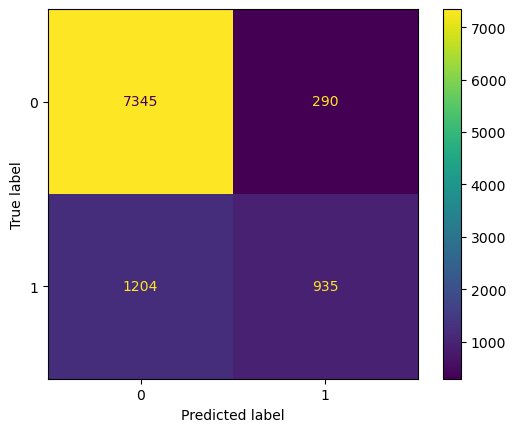

In [244]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=reg.classes_)
disp.plot()

plt.show()

In [253]:
cm_pct=np.array([[cm[0][0]/cm[0].sum(),cm[0][1]/cm[0].sum()],
        [cm[1][0]/cm[1].sum(),cm[1][1]/cm[1].sum()]])

In [254]:
cm_pct

array([[0.96201703, 0.03798297],
       [0.56287985, 0.43712015]])

In [255]:
type(cm)

numpy.ndarray

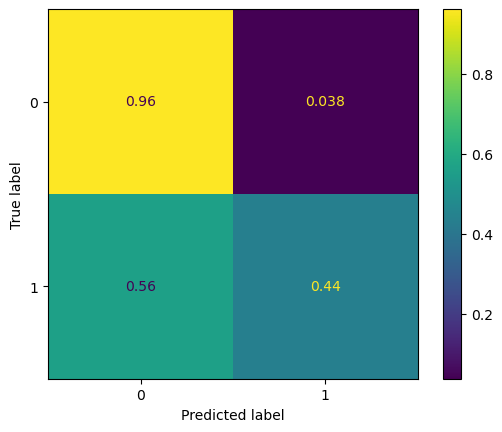

In [256]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_pct,
                              display_labels=reg.classes_)
disp.plot()

plt.show()

In [234]:
(7345+935)/(7345+1204+935+290)

0.8471454880294659

***What are the most significant variables in predicting default?***

In [257]:
DataFrame(data={'coef':reg.coef_.ravel(),'var':reg.feature_names_in_.ravel()}).sort_values(by='coef')

,coef,var
9,-0.389894,person_home_ownership_OWN
3,-0.338557,loan_amnt
14,-0.309710,loan_intent_VENTURE
10,-0.247763,loan_intent_EDUCATION
13,-0.176039,loan_intent_PERSONAL
1,-0.148036,person_income
8,-0.097901,person_home_ownership_MORTGAGE
2,-0.065110,person_emp_length
12,-0.037933,loan_intent_MEDICAL
6,-0.019490,cb_person_cred_hist_length


It seems like *loan percent income* is the most significant variable in predicting default. It's absolutely making sense. The loan amount has to be in corelation to the income, so if you give a high loan to a customer with low income there is a higher risk of default. 

*loan interest rate* is the second significant variable in predicting default. It's a bit tricky, because the interest rate is a decision of
the bank and not an attribute of the customer. So I'm not sure that I would use this variable for credit scoring because I don't feel that it gives me much more information
that I haven't known already.
However, It is nice to know that there is a high positive correlation between interest rates and risk levels.

The two most significant variables with negative influence on the probability of default are *loan amount* and *person_home_ownership_OWN*.


It makes sense that higher *loan amount* can predict lower probability of default, because I believe that less-risky customers naturally get higher amounts. On the other hand, maybe higher amounts mean the customer is more likely to have problems in paying the debt. So it seems that this variable can have both positive effect and negative effect but the negative effect is more significant. Again, I'm not sure it's a good idea to use our past decisions (whether it's loan amount or interest rate) as input variables for the model.

*person_home_ownership_OWN* also makes sense to have negative effect on probability of default, because a person who owns a home tends to be wealthier and also has the option to sell assets and use the profit to pay the debt.